## Observations and Insights
#### 1. Correlation shows that Capomulin and Ramicane might be way more effective at treating tumors than the other drugs
#### 2. there appears to be a correlation between weight of the mouse and size of it's tumor
#### 3. the line chart shows a consistent decrease in size as the drug Capomulin is used over time

In [43]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
merge_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [44]:
# Check the number of mice.
len(merge_df['Mouse ID'].unique())

249

In [45]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID = merge_df[merge_df.duplicated(subset=['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [46]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df[merge_df['Mouse ID']=='g989']


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [47]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df['Mouse ID']!='g989']
clean_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female           9          22  
1       Male          15          29  
2     Female           2          29  
3     Female          11          30  
4       Male          21          25  
...      ...         ...         ...  
1888    Male          12          25  
1889    Male          18          17  
1890  Female          11          26  
1891  Female          21          30  
1892  Female           4          26  

[1880 rows x 8 columns]

In [48]:
# Check the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [52]:
drug_group=clean_df.groupby(clean_df["Drug Regimen"])
drug_group_average=drug_group['Tumor Volume (mm3)'].mean()
drug_group_median=drug_group['Tumor Volume (mm3)'].median()
drug_group_var=drug_group['Tumor Volume (mm3)'].var()
drug_group_std=drug_group['Tumor Volume (mm3)'].std()
drug_group_sem=drug_group['Tumor Volume (mm3)'].sem()

user_df=pd.DataFrame({'Mean Tumor Volume':drug_group_average,'Median Tumor Volume':drug_group_median,'Tumor Volume Variance':drug_group_var,'Tumor Volume Std. Dev.':drug_group_std,'Tumor Volume Std. Err.':drug_group_sem})
#user_df=user_df.sort_values('Total Purch Value',ascending=False)
user_df.head(10)

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use this straighforward method, create multiple series and put them all in a dataframe at the end.


Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [56]:
# Group the data frame by month and item and extract a number of stats from each group
clean_df.groupby(clean_df["Drug Regimen"]).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem'],})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use method to produce everything with a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [29]:
mice_count=clean_df['Drug Regimen'].value_counts()
mice_count.index


Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
       'Stelasyn', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

In [35]:
x_axis=mice_count.index
y_axis=mice_count.values

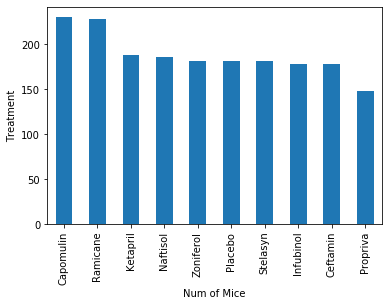

In [32]:

mice_count.plot(kind='bar')
plt.xlabel("Num of Mice")
plt.ylabel("Treatment")
plt.show()

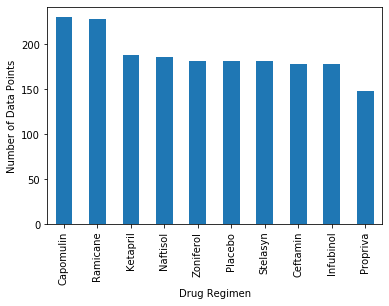

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 


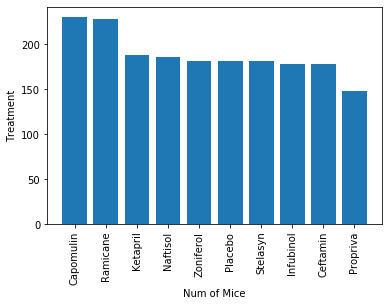

In [37]:
plt.bar(x_axis,y_axis)
plt.xticks(rotation=90)
plt.xlabel("Num of Mice")
plt.ylabel("Treatment")
plt.show()

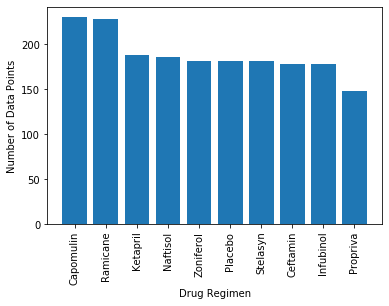

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


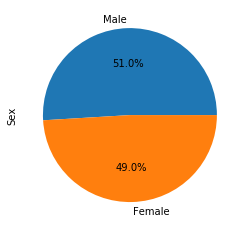

In [41]:
mice_sex=clean_df['Sex'].value_counts()
gender=mice_sex.values
labels=mice_sex.index
plt.pie(gender,labels=labels,autopct='%1.1f%%')
#plt.xticks(rotation=90)
#plt.xlabel("Num of Mice")
plt.ylabel("Sex")
plt.show()

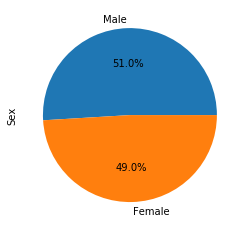

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


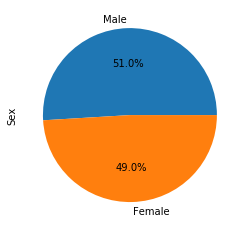

In [42]:
mice_sex.plot(kind='pie',autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

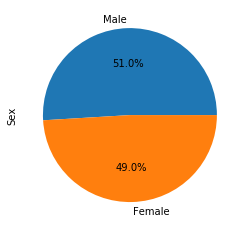

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [81]:
max_timepoint=clean_df.groupby('Mouse ID').max()['Timepoint'].reset_index()
merge_df = max_timepoint.merge(clean_df,how='left',on=['Mouse ID','Timepoint'])
merge_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [13]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [82]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively 
# determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_df[merge_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    # add subset to tumor volume data list
    tumor_vol_list.append(final_tumor_vol)
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers=final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [84]:
tumor_vol_list

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

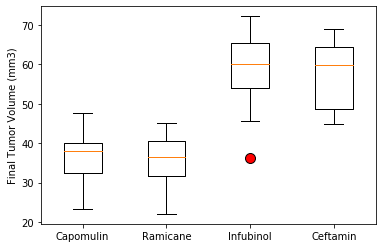

In [87]:
# Example outlier plot of reaction times
markers=dict(markerfacecolor='red',markersize=10)
plt.boxplot(tumor_vol_list,labels=treatment_list,flierprops=markers)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

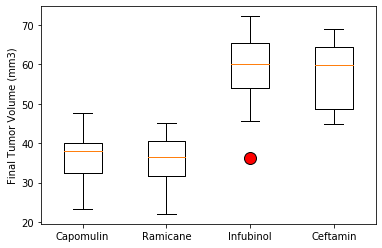

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

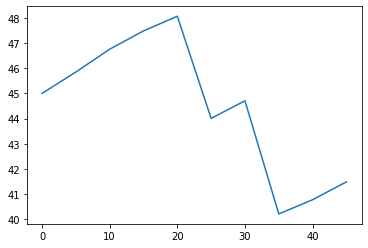

In [88]:
cap_data=clean_df[clean_df['Drug Regimen']=='Capomulin']
mouse_data=cap_data[cap_data['Mouse ID']=='l509']
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.show()


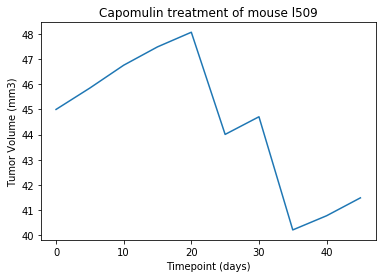

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [89]:
cap_avg=cap_data.groupby('Mouse ID').mean()
cap_avg

Timepoint  Tumor Volume (mm3)  Metastatic Sites  Age_months  \
Mouse ID                                                                
b128           22.5           41.963636              0.70         9.0   
b742           22.5           40.083699              0.00         7.0   
f966           10.0           36.505973              0.00        16.0   
g288           22.5           41.990097              0.80         3.0   
g316           22.5           44.613344              1.00        22.0   
i557           22.5           44.805810              0.20         1.0   
i738           22.5           39.141053              0.60        23.0   
j119           22.5           44.465236              0.60         7.0   
j246           17.5           43.216925              0.25        21.0   
l509           22.5           44.434474              1.40        17.0   
l897           22.5           42.507261              0.40        17.0   
m601           22.5           34.847470              0.90        22.0   
m957           22.5           39.049816              0.90         3.0   
r157            7.5           45.798970              0.00        22.0   
r554           22.5           36.509212              2.20         8.0   
r944           22.5           43.367364              0.90        12.0   
s185           22.5           34.559143              0.40         3.0   
s710           22.5           42.803733              0.60         1.0   
t565           22.5           39.328725              0.00        20.0   
u364           22.5           39.887495              1.80        18.0   
v923           22.5           41.581595              0.90        19.0   
w150            5.0           41.384825              0.00        23.0   
w914           22.5           41.352452              0.50        24.0   
x401           22.5           36.182040              0.00        16.0   
y793           22.5           38.506829              1.40        17.0   

          Weight (g)  
Mouse ID              
b128            22.0  
b742            21.0  
f966            17.0  
g288            19.0  
g316            22.0  
i557            24.0  
i738            20.0  
j119            23.0  
j246            21.0  
l509            21.0  
l897            19.0  
m601            17.0  
m957            19.0  
r157            25.0  
r554            17.0  
r944            25.0  
s185            17.0  
s710            23.0  
t565            17.0  
u364            17.0  
v923            21.0  
w150            23.0  
w914            21.0  
x401            15.0  
y793            17.0

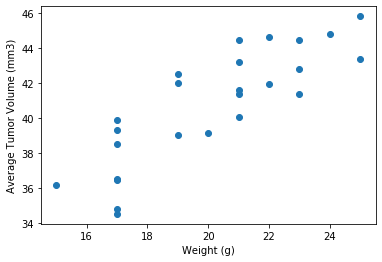

In [91]:
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

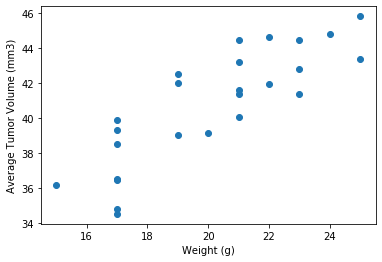

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

The correlation between both factors is 0.84


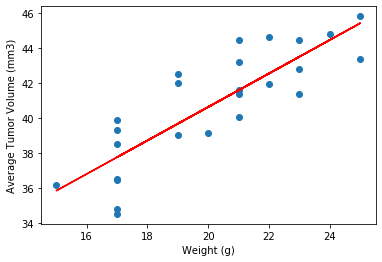

In [95]:
#cap_avg.corr(method='pearson')
correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
regress_values = cap_avg['Weight (g)'] * slope + intercept
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.plot(cap_avg['Weight (g)'],regress_values,color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


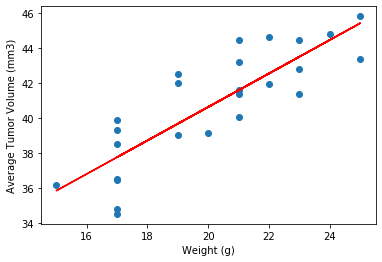

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
